In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lab Assignment 8
### Jaskirat Singh Maskeen (23110146)


###### Loading the dataset

In [ ]:
df = sns.load_dataset(name='iris')
species = list(df['species'].unique())

##### Covariance and Coreelation coefficient

Cov $(X,Y) = \mathbb{E}[XY]-\mathbb{E}[X].\mathbb{E}[Y]$<br>
where, X and Y are the random variables.
<br>
Variances:
<br>
var(X) = $\mathbb{E}[(x - \mathbb{E}[X])^2]$<br>
var(Y) = $\mathbb{E}[(y - \mathbb{E}[Y])^2]$
<br>
####Correlation Coefficnet:
<br>
$\rho = \frac{Cov(X,Y)}{\sqrt{var(X)}.\sqrt{var(Y)}}$
<br>
<br>
Properites:
<br>

$|\rho| <= 1$
<br>
$\rho = 1 \implies $ Positive Correlation
<br>
$\rho = -1 \implies $ Negative Correlation
<br>
$\rho = 0 \implies $ No correlation


### For all species

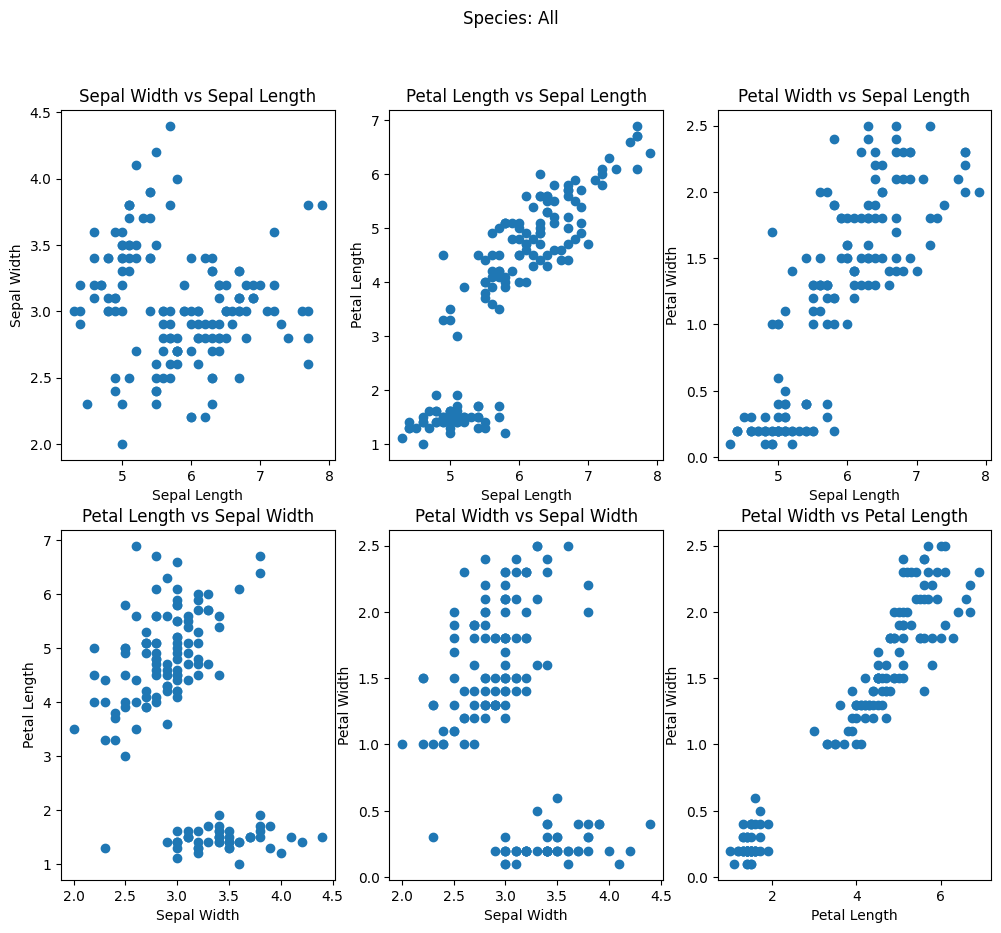

In [ ]:
def show_graphs(sp=None):
  if sp:
    data = df[df['species']==sp].iloc[: , :4].to_numpy()
  else:
    data = df.iloc[: , :4].to_numpy()
    sp = 'All'
  attribs = [' '.join(map(str.title,i.split('_'))) for i in df.iloc[:,:4].columns]
  attrib_val = list(zip(*data))
  pairs = [(i,j) for i in range(4) for j in range(i+1,4)]
  plt.figure(figsize=(12,10))
  for i in range(len(pairs)):
    plt.subplot(2,3,i+1)
    o,t = pairs[i]
    plt.scatter(attrib_val[o],attrib_val[t])
    plt.xlabel(attribs[o])
    plt.ylabel(attribs[t])
    plt.title(f'{attribs[t]} vs {attribs[o]}')
  plt.suptitle(f'Species: {sp.title()}')
  plt.show()
  return attribs,attrib_val,pairs,sp

attribs,attrib_val,pairs,sp = show_graphs()

In [ ]:
def show_ans(attribs,attrib_val,pairs,sp):
  print(f'Correlation coefficients in descending order [Species: {sp.title()}]:')
  ans = []
  mean_d = {}
  var_d = {}
  for i in range(len(pairs)):
    o,t = pairs[i]
    x,y = np.array(attrib_val[o]),np.array(attrib_val[t])
    n = len(x)
    Mx = sum(x)/n
    My = sum(y)/n
    if o not in mean_d:
      mean_d.update({o:Mx})
    if t not in mean_d:
      mean_d.update({t:My})
    varx = sum((x-Mx)**2)/(n-1)
    vary = sum((y-My)**2)/(n-1)
    if o not in var_d:
      var_d.update({o:varx})
    if t not in var_d:
      var_d.update({t:vary})
    cov = np.dot(x-Mx,y-My)/(n-1)
    ans.append((cov/np.sqrt(varx*vary) ,f'Correlation coefficient for {attribs[t]} vs {attribs[o]} is {np.round(cov/np.sqrt(varx*vary),8)}', (o,t)))
    ans.sort(key=lambda x:x[0],reverse=True)
  for i in ans:
    print(i[1])
  return mean_d,var_d

mean,var = show_ans(attribs,attrib_val,pairs,sp)
print()
print()
for k,v in mean.items():
  print(f'Mean for the attribute: {attribs[k]} is {np.round(v,8)}')
  print(f'Variance for the attribute: {attribs[k]} is {np.round(var[k],8)}')
  print()

Correlation coefficients in descending order [Species: All]:
Correlation coefficient for Petal Width vs Petal Length is 0.96286543
Correlation coefficient for Petal Length vs Sepal Length is 0.87175378
Correlation coefficient for Petal Width vs Sepal Length is 0.81794113
Correlation coefficient for Sepal Width vs Sepal Length is -0.11756978
Correlation coefficient for Petal Width vs Sepal Width is -0.36612593
Correlation coefficient for Petal Length vs Sepal Width is -0.4284401


Mean for the attribute: Sepal Length is 5.84333333
Variance for the attribute: Sepal Length is 0.68569351

Mean for the attribute: Sepal Width is 3.05733333
Variance for the attribute: Sepal Width is 0.18997942

Mean for the attribute: Petal Length is 3.758
Variance for the attribute: Petal Length is 3.11627785

Mean for the attribute: Petal Width is 1.19933333
Variance for the attribute: Petal Width is 0.58100626



### For species 1


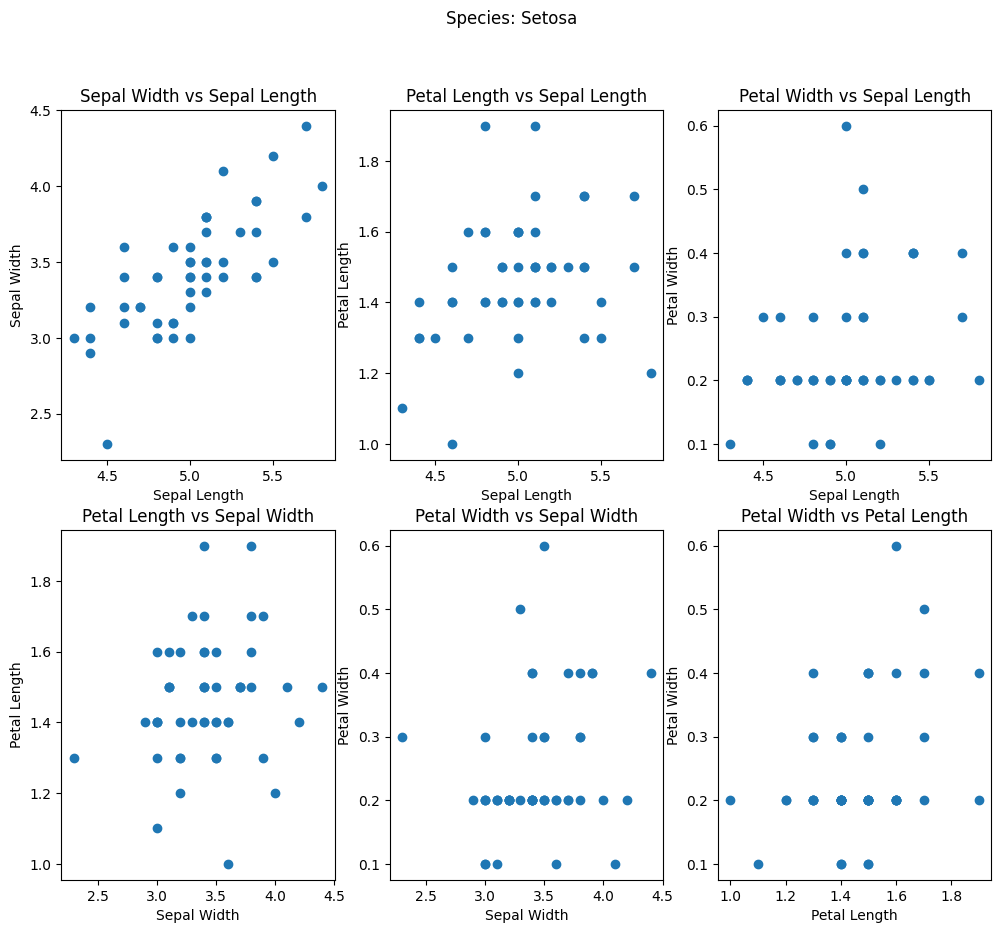

In [ ]:
sp = species[0]
attribs,attrib_val,pairs,sp = show_graphs(sp)

In [ ]:
_,_=show_ans(attribs,attrib_val,pairs,sp)

Correlation coefficients in descending order [Species: Setosa]:
Correlation coefficient for Sepal Width vs Sepal Length is 0.74254669
Correlation coefficient for Petal Width vs Petal Length is 0.33163004
Correlation coefficient for Petal Width vs Sepal Length is 0.27809835
Correlation coefficient for Petal Length vs Sepal Length is 0.26717576
Correlation coefficient for Petal Width vs Sepal Width is 0.23275201
Correlation coefficient for Petal Length vs Sepal Width is 0.17769997


### For species 2


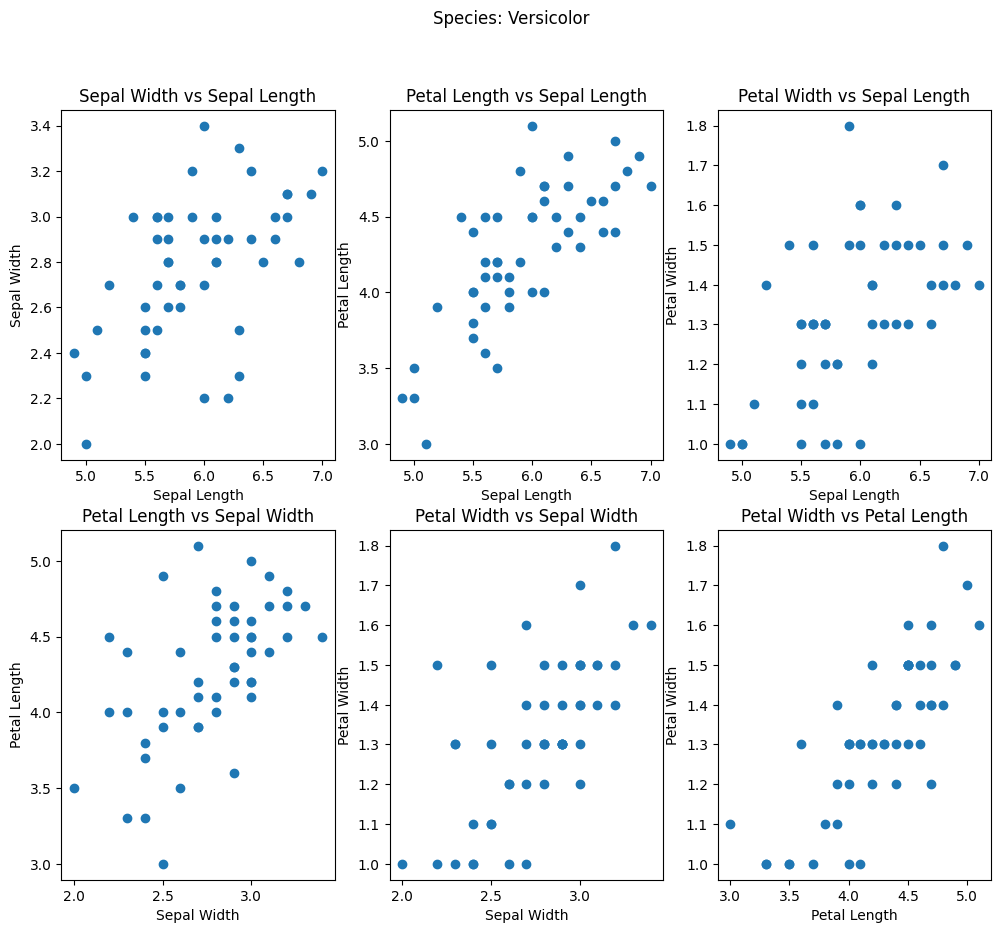

In [ ]:
sp = species[1]
attribs,attrib_val,pairs,sp = show_graphs(sp)

In [ ]:
_,_=show_ans(attribs,attrib_val,pairs,sp)

Correlation coefficients in descending order [Species: Versicolor]:
Correlation coefficient for Petal Width vs Petal Length is 0.78666809
Correlation coefficient for Petal Length vs Sepal Length is 0.75404896
Correlation coefficient for Petal Width vs Sepal Width is 0.66399872
Correlation coefficient for Petal Length vs Sepal Width is 0.56052209
Correlation coefficient for Petal Width vs Sepal Length is 0.54646107
Correlation coefficient for Sepal Width vs Sepal Length is 0.52591072


### For species 3


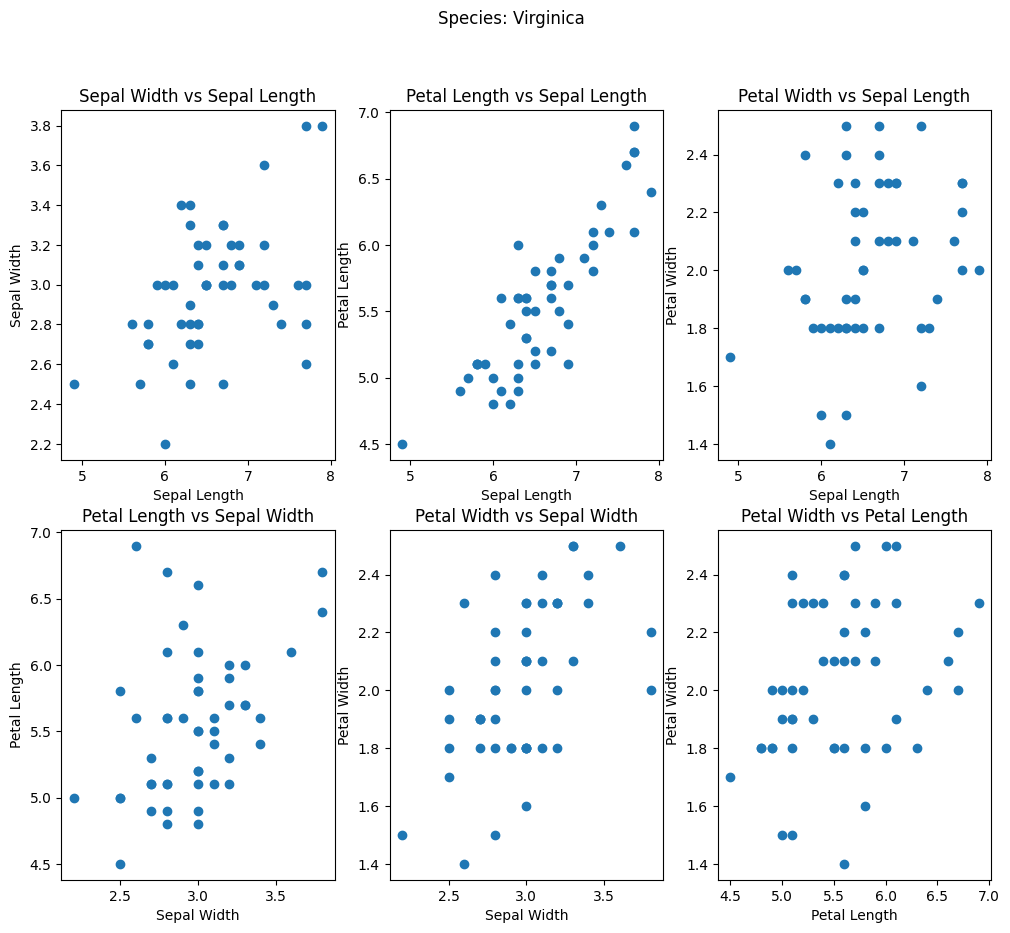

In [ ]:
sp = species[2]
attribs,attrib_val,pairs,s = show_graphs(sp)

In [ ]:
_,_=show_ans(attribs,attrib_val,pairs,sp)

Correlation coefficients in descending order [Species: Virginica]:
Correlation coefficient for Petal Length vs Sepal Length is 0.86422473
Correlation coefficient for Petal Width vs Sepal Width is 0.53772803
Correlation coefficient for Sepal Width vs Sepal Length is 0.45722782
Correlation coefficient for Petal Length vs Sepal Width is 0.40104458
Correlation coefficient for Petal Width vs Petal Length is 0.32210822
Correlation coefficient for Petal Width vs Sepal Length is 0.28110771
